In [20]:
import os
import pandas as pd
import hddm
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load data
data = hddm.load_csv('eeg_ddm.csv')
data.rt = data.rt/1000
data.response = 1-data.response
data = hddm.utils.flip_errors(data)

In [22]:
data

,subj_idx,outSold,stim,stimulus,type,response,rt,gender,race
0,15,0,female,face,neutral,1,2.440,female,Asian
1,15,0,female,face,neutral,1,2.142,female,Asian
2,15,0,female,face,neutral,1,2.435,female,Asian
3,15,0,female,face,neutral,1,2.341,female,Asian
4,15,0,male,face,neutral,1,2.037,female,Asian
...,...,...,...,...,...,...,...,...,...
15144,95,1,tree,tree,tree,0,-1.858,female,Caucasian
15145,95,1,tree,tree,tree,0,-1.858,female,Caucasian
15146,95,1,tree,tree,tree,0,-2.457,female,Caucasian
15147,95,1,tree,tree,tree,0,-1.842,female,Caucasian


In [23]:
m = hddm.HDDM(data, depends_on={'v': ['type','race'], 'a': ['type','race'], 'z': ['type','race']}, bias = True, p_outlier=.05)
m.find_starting_values()
m.sample(20000, burn=1000, dbname='db_eeg_final_zWtihTree', db='pickle')
m.save('model_eeg_final_zWtihTree')

/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------73%-------           ] 14717 of 20000 complete in 12613.4 sec

/opt/conda/lib/python3.8/site-packages/hddm/models/base.py:658: RuntimeWarning: overflow encountered in double_scalars
  shape = Knode(pm.Deterministic, '%s_shape' % name, eval=lambda x,y: (x**2)/(y**2),
/opt/conda/lib/python3.8/site-packages/hddm/models/base.py:661: RuntimeWarning: overflow encountered in true_divide
  rate = Knode(pm.Deterministic, '%s_rate' % name, eval=lambda x,y: x/(y**2),


 [-----------------100%-----------------] 20001 of 20000 complete in 24463.2 sec

In [24]:
m.dic

10057.747551532857

In [25]:
v_asian_neutral, v_asian_pain, v_asian_tree = m.nodes_db.node[['v(Asian.neutral)', 'v(Asian.pain)','v(Asian.tree)']]
v_caucasian_neutral, v_caucasian_pain, v_caucasian_tree = m.nodes_db.node[['v(Caucasian.neutral)', 'v(Caucasian.pain)','v(Caucasian.tree)']]
a_asian_neutral, a_asian_pain, a_asian_tree = m.nodes_db.node[['a(Asian.neutral)', 'a(Asian.pain)','a(Asian.tree)']]
a_caucasian_neutral, a_caucasian_pain, a_caucasian_tree = m.nodes_db.node[['a(Caucasian.neutral)', 'a(Caucasian.pain)','a(Caucasian.tree)']]

Text(0, 0.5, 'Posterior probability')

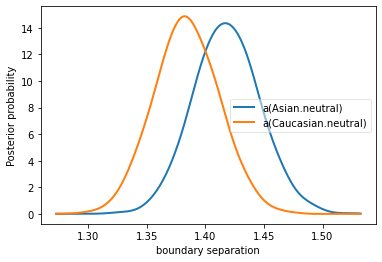

In [26]:
hddm.analyze.plot_posterior_nodes([a_asian_neutral, a_caucasian_neutral],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')

In [27]:
(a_asian_neutral.trace()<a_caucasian_neutral.trace()).mean()

0.19410526315789473

Text(0, 0.5, 'Posterior probability')

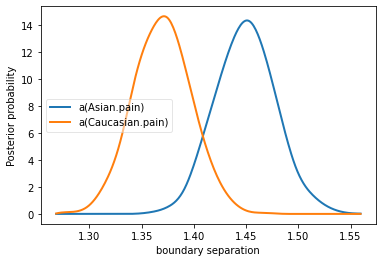

In [28]:
hddm.analyze.plot_posterior_nodes([a_asian_pain, a_caucasian_pain],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')

In [32]:
(a_asian_pain.trace()<a_caucasian_pain.trace()).mean()

0.02168421052631579

Text(0, 0.5, 'Posterior probability')

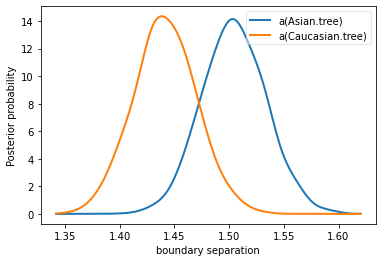

In [30]:
hddm.analyze.plot_posterior_nodes([a_asian_tree, a_caucasian_tree],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')

In [31]:
(a_asian_tree.trace()<a_caucasian_tree.trace()).mean()

0.060526315789473685